In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# necessario adicionar os dados manualmente no ambiente da IDE do Jupyter Notebook online
!ls

'data DeepQN_Adam_Optimizer.csv'	'return DeepQN_Adam_Optimizer.csv'
'data DeepQN_Adam_Optimizer final.csv'	 sample_data
 responses_pid.csv


In [3]:
df_ret = pd.read_csv('return DeepQN_Adam_Optimizer.csv')
df = pd.read_csv('data DeepQN_Adam_Optimizer final.csv')
df_pid = pd.read_csv('responses_pid.csv')

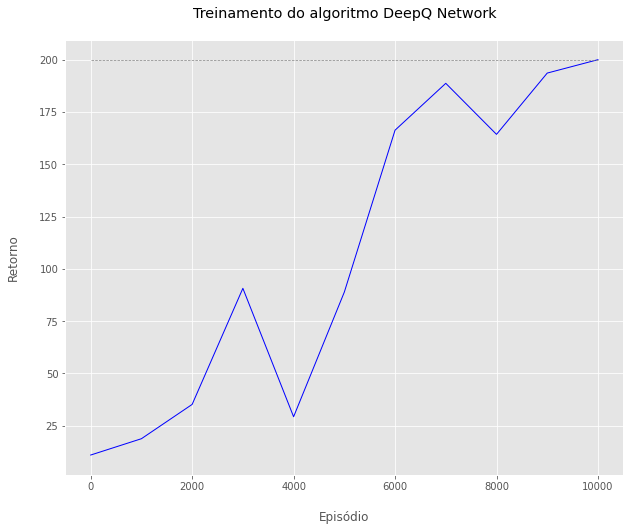

In [4]:
df_ret['two_hundred'] = 200

plt.figure(2, figsize = (10, 8))
plt.plot(df_ret.iterations, df_ret.returns, 'b-', linewidth = 1)
plt.plot(df_ret.iterations, df_ret.two_hundred, '--', color = 'gray', linewidth = .7)
plt.title('Treinamento do algoritmo DeepQ Network\n')
plt.xlabel('\nEpisódio')
plt.ylabel('Retorno\n')
plt.show()

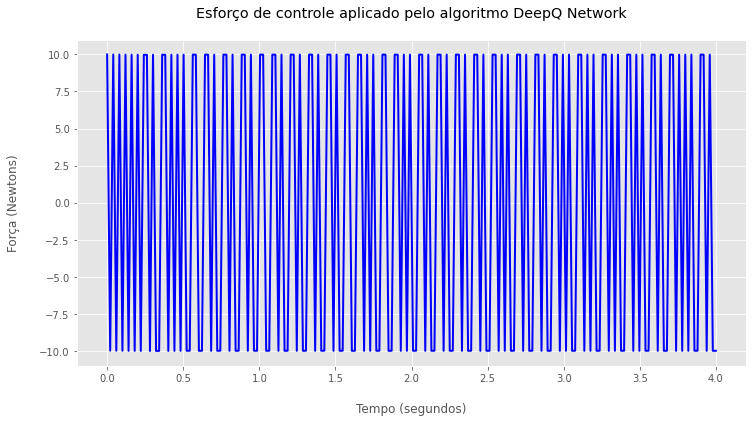

In [5]:
plt.figure(2, figsize = (12, 6))
plt.plot(df.tempo, df.forca, 'b-', linewidth = 2)
plt.title('Esforço de controle aplicado pelo algoritmo DeepQ Network\n')
plt.xlabel('\nTempo (segundos)')
plt.ylabel('Força (Newtons)\n')
plt.show()

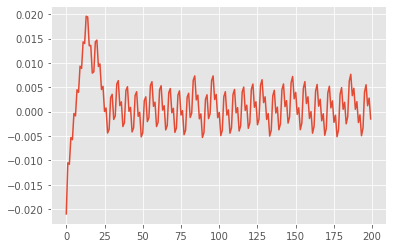

In [6]:
df.theta.plot()

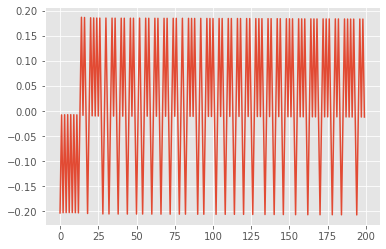

In [7]:
df.x_dot.plot()

In [8]:
df

,Unnamed: 0,Unnamed: 0.1,theta,theta_dot,x,x_dot,tempo,forca
0,0,0,-0.021000,0.282758,3.010000e-07,-0.203021,0.000000,9.992089
1,1,1,-0.010511,-0.014979,-4.060118e-03,-0.007672,0.020101,-9.972697
2,2,2,-0.010811,0.274369,-4.213561e-03,-0.202642,0.040201,9.988292
3,3,3,-0.005324,-0.021704,-8.266397e-03,-0.007367,0.060302,-9.976562
4,4,4,-0.005758,0.269294,-8.413743e-03,-0.202412,0.080402,9.984666
...,...,...,...,...,...,...,...,...
195,195,195,0.004010,0.075603,6.835440e-02,-0.011778,3.919598,9.977535
196,196,196,0.005522,-0.215812,6.811884e-02,0.183286,3.939698,-9.984503
197,197,197,0.001206,0.078608,7.178455e-02,-0.011915,3.959799,9.979602
198,198,198,0.002778,-0.213694,7.154627e-02,0.183190,3.979899,-9.982514


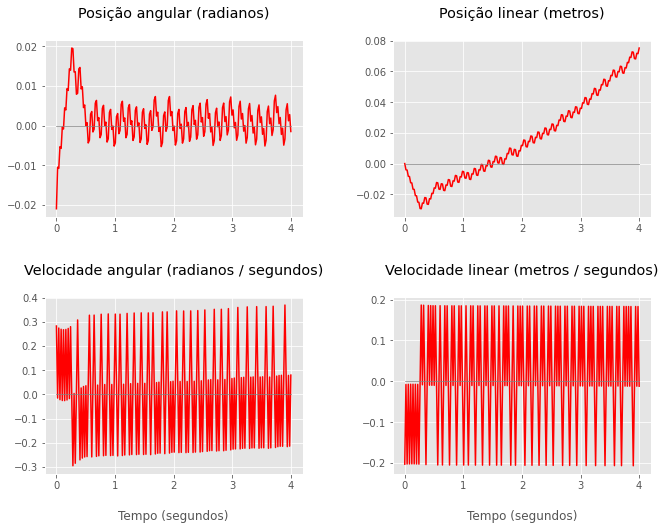

In [9]:
df['zero'] = 0

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(df.tempo, df.theta, color = 'red')
axs[0, 0].plot(df.tempo, df.zero, color = 'gray', linewidth = .7)
axs[0, 0].set_title('Posição angular (radianos)\n')

axs[0, 1].plot(df.tempo, df.x, color = 'red')
axs[0, 1].plot(df.tempo, df.zero, color = 'gray', linewidth = .7)
axs[0, 1].set_title('Posição linear (metros)\n')

axs[1, 0].plot(df.tempo, df.theta_dot, color = 'red')
axs[1, 0].plot(df.tempo, df.zero, color = 'gray', linewidth = .7)
axs[1, 0].set_title('Velocidade angular (radianos / segundos)\n')

axs[1, 1].plot(df.tempo, df.x_dot, color = 'red')
axs[1, 1].plot(df.tempo, df.zero, color = 'gray', linewidth = .7)
axs[1, 1].set_title('Velocidade linear (metros / segundos)\n')

for num, ax in enumerate(axs.flat):
  if num in [2, 3]:
    ax.set(xlabel='\nTempo (segundos)')


# using padding
fig.tight_layout(pad=3.0)

plt.show()

In [10]:
df.theta_dot.min(), df.theta_dot.max()

(-0.29470772, 0.36934873)

In [11]:
df.x_dot.min(), df.x_dot.max()

(-0.20694809, 0.18685924)

In [12]:
df.x.min()

-0.029410483

In [13]:
def rmse(predictions):
  differences = predictions - np.zeros_like(predictions)
  squared_differences = differences ** 2
  mean = np.mean(squared_differences)
  return np.sqrt(mean)

In [14]:
rmse_theta = rmse(df.theta)
rmse_theta

0.005199490115494549

In [15]:
rmse_x = rmse(df.x)
rmse_x

0.032055049356294066

In [16]:
df_pid

,Unnamed: 0,tempo,theta,x
0,0,0.000000,-0.021000,0.000000
1,1,0.020101,-0.018109,-0.001968
2,2,0.040201,-0.009418,-0.007872
3,3,0.060302,-0.000787,-0.013774
4,4,0.080402,0.001924,-0.015734
...,...,...,...,...
195,195,3.919598,-0.002695,0.001004
196,196,3.939698,0.000213,-0.000964
197,197,3.959799,0.003122,-0.002933
198,198,3.979899,0.006051,-0.004903


<ipython-input-22-5d529db66334>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


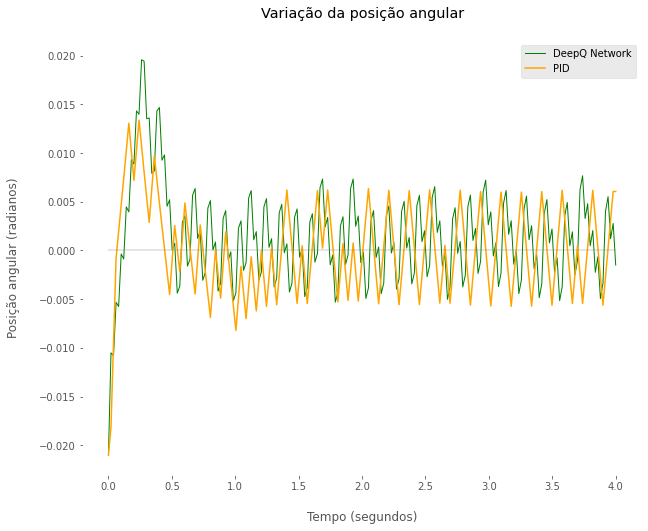

In [22]:
fig = plt.figure(2, figsize = (10, 8), facecolor="w")
fig.set_facecolor("w")

plt.plot(df.tempo, df.theta, color='green', linewidth = 1, label = 'DeepQ Network')
plt.plot(df_pid.tempo, df_pid.theta, color='orange', linewidth = 1.5, label = 'PID')
plt.title('Variação da posição angular\n')
plt.xlabel('\nTempo (segundos)')
plt.ylabel('Posição angular (radianos)\n')

plt.plot(df.tempo, df.zero, color = 'gray', linewidth = .4)

plt.legend()

ax = plt.axes()
 
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")

plt.show()

<ipython-input-23-58a7332d23d2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


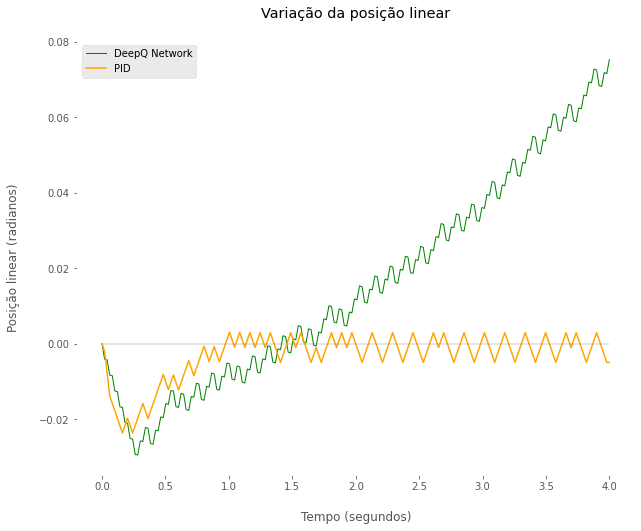

In [23]:
fig = plt.figure(2, figsize = (10, 8), facecolor="w")
fig.set_facecolor("w")

plt.plot(df.tempo, df.x, color='green', linewidth = 1, label = 'DeepQ Network')
plt.plot(df_pid.tempo, df_pid.x, color='orange', linewidth = 1.5, label = 'PID')
plt.title('Variação da posição linear\n')
plt.xlabel('\nTempo (segundos)')
plt.ylabel('Posição linear (radianos)\n')

plt.plot(df.tempo, df.zero, color = 'gray', linewidth = .4)

plt.legend()

ax = plt.axes()
 
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")

plt.show()

In [19]:
rmse_theta = rmse(df_pid.theta)
rmse_theta

0.004667505328185286

In [20]:
rmse_theta = rmse(df_pid.x)
rmse_theta

0.006849666736971325